## Overview

In this homework, you will try some embeddings models on text data. Lastly, you will visualize the text embeddings.

---

In [1]:
import os
import sys

DATA_PATH = "../HW2_Embedding-lib/data/"

assert os.path.isdir(DATA_PATH)
sys.path.append('../HW2_Embedding-lib')

import matplotlib.pyplot as plt

---

## 1 Word2Vec [60 points]

In this question, you will perform word2vec on the given MIMIC-III dataset.

## About Raw Data

Navigate to `DATA_PATH`, in the `mimic-iii-clinical-notes` folder, there are a csv file used for training. The data is originally from the MIMIC-III (Medical Information Mart for Intensive Care) database. A detailed description of the dataset could be found [here](https://mimic.physionet.org).

In [2]:
!ls {DATA_PATH}/mimic-iii-clinical-notes

train.csv


The data provided in *train.csv* is a merged table originally from the ADMISSIONS and NOTEEVENTS MIMIC tables. 

The columns of interest in this table are:
- **SUBJECT_ID**: unique identifier for each subject
- **HADM_ID**: unique identifier for each hospitalization
- **ADMITTIME**: admission date with format YYYY-MM-DD hh:mm:ss
- **DISCHTIME**: discharge date with format YYYY-MM-DD hh:mm:ss
- **DAYS_NEXT_ADMIT**: the days until the next admission (if it exists)
- **NEXT_ADMITTIME**: the date of the next admission (if it exists)
- **ADMISSION_TYPE**: includes ELECTIVE, EMERGENCY, NEWBORN, URGENT
- **DEATHTIME**: death time (if it exists) with format YYYY-MM-DD hh:mm:ss
- **TEXT**: clinical notes
- **OUTPUT_LABEL**: label indicating if a patient will be admitted in the next 30 days (1 = readmitted, 0 = not readmitted)

In [3]:
import pandas as pd


def load_dataset(filepath):    
    """ Read the train.csv file """
    df_train = pd.read_csv(filepath + 'train.csv', index_col=0)
    return df_train


df_train = load_dataset(os.path.join(DATA_PATH, 'mimic-iii-clinical-notes/'))
df_train.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT,OUTPUT_LABEL
0,45441,138742,2157-01-14 01:41:00,2157-01-18 16:00:00,NaN,NaN,EMERGENCY,NaN,Admission Date: [**2157-1-14**] ...,0
1,24356,181685,2158-03-26 01:43:00,2158-03-27 17:20:00,NaN,NaN,EMERGENCY,NaN,NaN,0
2,21817,125287,2117-08-02 19:36:00,2117-08-06 14:45:00,3.367361,2117-08-09 23:34:00,EMERGENCY,NaN,"Name: [**Known lastname 6309**], [**Known fir...",1
3,63941,126602,2196-04-22 19:32:00,2196-04-27 18:18:00,NaN,NaN,EMERGENCY,NaN,Admission Date: [**2196-4-22**] ...,0
4,32420,137514,2110-06-16 14:04:00,2110-06-25 19:00:00,0.755556,2110-06-26 13:08:00,EMERGENCY,NaN,Admission Date: [**2110-6-16**] ...,1


### 1.1 Preprocess the text data [20 points]

In order to preprocess the text data, you should:
- Fill NA with SPACE
- Replace new lines ('\n') and carriage returns ('\r') with SPACE
- Replace punctuations and numbers with SPACE
- Convert to lower-case
- Split each sentence into a list of words

In [4]:
import time
import numpy as np
import string
from nltk import word_tokenize


# PLEASE USE THE GIVEN FUNCTION NAME, DO NOT CHANGE IT


#input
# df: a dataframe returned by `load_dataset`
#output
# clinical_notes: a list of clinical notes where each clinical note is broke into a list of words 
def preprocess_dataset(df):    
    ''' Preprocess the text data. And return a list of clinical notes. '''
    clinical_notes = []
    
    df.TEXT = df.TEXT.fillna(' ')  # remove NA
    df.TEXT = df.TEXT.str.replace('\n',' ')  # remove newline
    df.TEXT = df.TEXT.str.replace('\r',' ')
    """
    TODO: 1. remove punc;
          2. remove numbers.
          
    HINT: consider using `string.punctuation`, `str.maketrans`, and `str.translate`.
    """
#     # your code here
    df.TEXT = df.TEXT.str.translate(str.maketrans('', '', string.punctuation))
    tr = str.maketrans(string.ascii_letters, string.ascii_letters, string.digits)
    df.TEXT = df.TEXT.str.translate(tr)
#     raise NotImplementedError
    
    df.TEXT = df.TEXT.str.lower()  # convert to lower case
    
    # tokenize
    for note in df.TEXT.values:
        note_tokenized = word_tokenize(note)
        clinical_notes.append(note_tokenized)

    return clinical_notes

In [5]:
train_clinical_notes = preprocess_dataset(df_train)

In [6]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert len(train_clinical_notes) == 800

for note in train_clinical_notes:
    a = [i.isalpha() for i in note]
    assert False not in a, "numbers, punctuations are not removed!"

In [7]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

### 1.2 Train a word2vec model [20 points]
We will be using the Word2Vec implementation. You should:
1. Set the word vector size to 100. 
2. Ignores all words with total frequency lower than (<) 20. 
3. use only 1 worker (workers=1) to ensure deterministic behavior
4. set the seed to the provided value RANDOM_SEED
Keep the other paramters as default. Train the model on the training dataset.

REFERENCE: [tutorial](https://radimrehurek.com/gensim/models/word2vec.html)

In [8]:
RANDOM_SEED = 2021
import os; os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
# DO NOT modify these (or Coursera may timeout)!
# Dimensionality of the word vectors
VEC_SIZE=100
# Ignores all words with total frequency lower than this
MIN_COUNT = 20

from gensim.models import Word2Vec

"""
TODO: Train the Word2Vec model (`w2v_model`).
NOTE: Remember to set the `size` and `min_count`.
"""
w2v_model = None
w2v_model = Word2Vec(sentences=train_clinical_notes, size=VEC_SIZE, min_count=MIN_COUNT, workers=1, seed=RANDOM_SEED)
# raise NotImplementedError

assert w2v_model.workers == 1, "Please use only 1 worker for deterministic behavior."

In [9]:
print("Size of vocab: %d" % len(w2v_model.wv.vocab))
print("First five vocabs: ", list(w2v_model.wv.vocab)[:5])

Size of vocab: 4293
First five vocabs:  ['admission', 'date', 'discharge', 'of', 'birth']


In [10]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert isinstance(train_clinical_notes, list)
assert isinstance(w2v_model, Word2Vec)

In [11]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

### 1.3 Evaluate the model [20 points]

**Odd one out**: Given three words (e.g. 'consolidation', 'opacity' and 'signal'), find the odd one out (e.g. 'signal').

In [28]:
#input
# model: word2vec model
# list_of_words: a list of words, e.g. ['consolidation', 'opacity', 'signal']
#output
# odd_word: the odd word
def odd_one_out(model, list_of_words):
    
    """
    TODO: Find the odd word from the list using the trained word2vec model.
    HINT: Consider the *doesnt_match* method.
    """
    
    # your code here
    return model.doesnt_match(list_of_words)
#     raise NotImplementedError

In [29]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

list_of_words = ['consolidation', 'opacity', 'signal']
assert type(odd_one_out(w2v_model, list_of_words)) is str
print("The odd word among '%s' is: '%s'." % (', '.join(list_of_words), odd_one_out(w2v_model, list_of_words)))

list_of_words = ['heart', 'beat', 'pupil']
assert type(odd_one_out(w2v_model, list_of_words)) is str
print("The odd word among '%s' is: '%s'." % (', '.join(list_of_words), odd_one_out(w2v_model, list_of_words)))


The odd word among 'consolidation, opacity, signal' is: 'signal'.
The odd word among 'heart, beat, pupil' is: 'heart'.


In [30]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

**Similar words**: Given a word (e.g. 'consolidation'), find the words similar to this word (e.g. 'opacity').

In [51]:
#input: model: word2vec model
#       word: a single word, e.g. 'consolidation'
#output: list_of_wrods: a list of words similar to the given word
def similar_word(model, word):
    
    """
    TODO: Find the words similar to the given word.
    HINT: Consider the *most_similar* method.
    """
    
    list_of_words = []

    # your code here
    sim = model.most_similar(positive=[word])
    
    for i in sim:
        list_of_words.append(i[0])
#     print(list_of_words)
#     raise NotImplementedError
    
    return list_of_words

In [52]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

word = 'consolidation'
assert type(similar_word(w2v_model, word)) is list
print("The words similar to '%s' are: '%s'." % (word, ', '.join(similar_word(w2v_model, word))))

word = 'pain'
assert type(similar_word(w2v_model, word)) is list
print("The words similar to '%s' are: '%s'." % (word, ', '.join(similar_word(w2v_model, word))))


The words similar to 'consolidation' are: 'atelectasis, opacities, emphysema, opacity, parenchymal, interstitial, bibasilar, patchy, retrocardiac, contusion'.
The words similar to 'pain' are: 'discomfort, tightness, sob, dyspnea, substernal, nausea, exertion, headache, xray, xrays'.


In [53]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

## 2 t-SNE, UMAP [40 points]

In this question, you will perform t-SNE and UMAP on the medical representations obtained from the previous sections.

In [54]:
# load the word2vec model from Q2
from gensim.models import Word2Vec

# embeddings
X = w2v_model[w2v_model.wv.vocab]
# words
W = list(w2v_model.wv.vocab)

# select only a subset of the words
X_subset = X[:1000]
W_subset = W[:1000]

In [55]:
import matplotlib.pyplot as plt
import random

def plot(X, Y, W):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(Y[:, 0], Y[:, 1], 'o')
    ax.set_yticklabels([]) #Hide ticks
    ax.set_xticklabels([]) #Hide ticks

    for i, word in enumerate(W):
        if random.uniform(0,1) > 0.9:
            plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
    plt.show()

### 2.1 t-SNE [20 points]

Perform t-SNE on `X_subset` and plot the results. 

REFERENCE: [tutorial](https://www.datacamp.com/community/tutorials/introduction-t-sne)

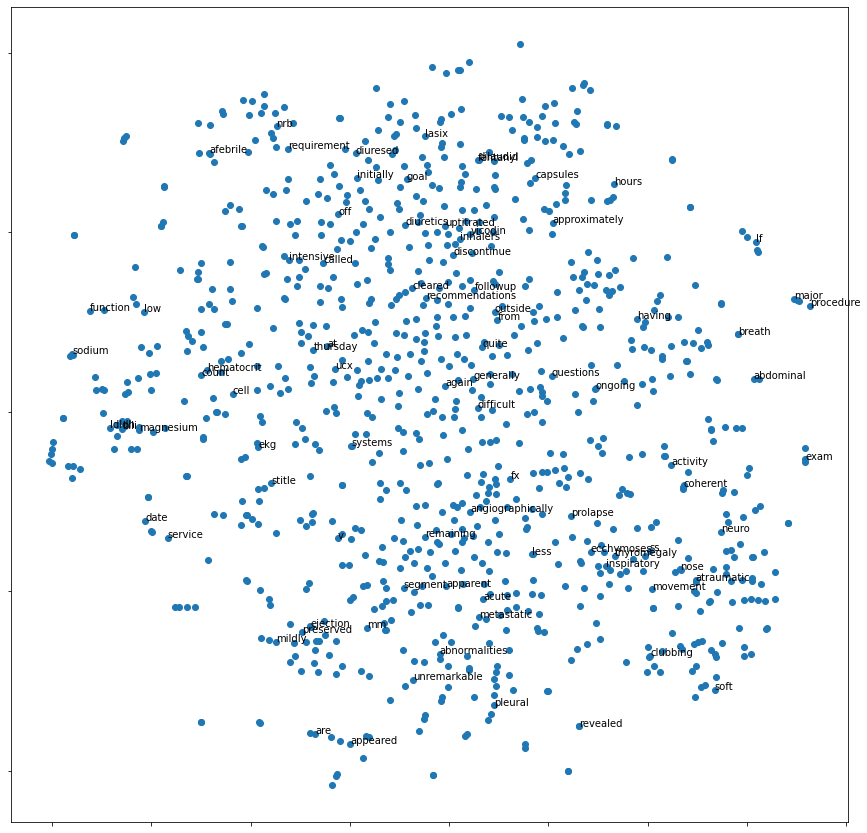

In [61]:
# t-SNE

from sklearn.manifold import TSNE


"""
TODO: Perform t-SNE on `X_subset`.
"""

Y_subset_tsne = None

Y_subset_tsne = TSNE().fit_transform(X_subset)
# print(Y_subset_tsne)
# raise NotImplementedError

plot(X_subset, Y_subset_tsne, W_subset)

In [62]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

from inspect import signature

assert len(Y_subset_tsne)==1000, "Y_subset_tsne has wrong dimensions"
sig = signature(plot)
assert len(sig.parameters)==3, "need to plot all dimensions of t-SNE!"


In [63]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

### 2.2 UMAP [20 points]

Perform UMAP on `X_subset` and plot the results. 

REFERENCE: [tutorial](https://umap-learn.readthedocs.io/en/latest/basic_usage.html#digits-data)

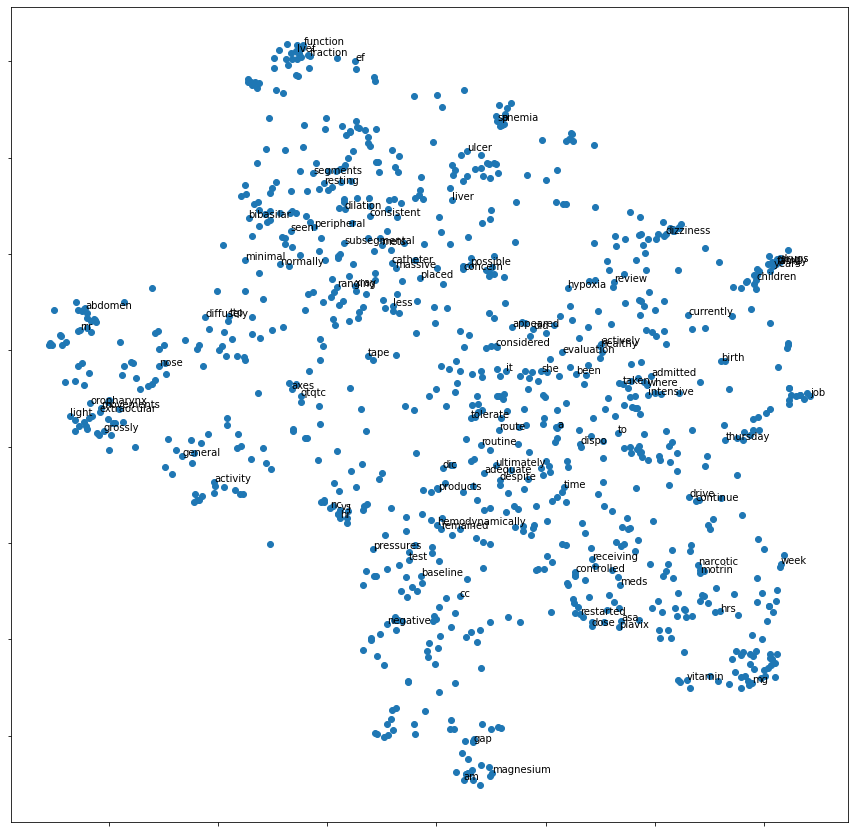

In [65]:
# UMAP

import umap.umap_ as umap #package is umap-learn


"""
TODO: Perform UMAP on `X_subset`.
"""

Y_subset_umap = None

# your code here
fit = umap.UMAP()
Y_subset_umap  = fit.fit_transform(X_subset)
# raise NotImplementedError

plot(X_subset, Y_subset_umap, W_subset)

In [66]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

from inspect import signature

assert len(Y_subset_umap)==1000, "Y_subset_umap has wrong dimensions"
sig = signature(plot)
assert len(sig.parameters)==3, "need to plot all dimensions of UMAP!"


In [67]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

Check if the embeddings make sense. Due to the hardware and runtime limitation, we cannot reach the state-of-the-art performance. But you will have chance to work with more advanced model in the project.